## Introduction


In this notebook, I replicated the Gao (2018) paper where they used GMM and Random Forest (RF) to get the membership for M67 open cluster.


## Reference

* Gao, X. (2018). A Machine-learning-based Investigation of the Open Cluster M67. *The Astrophysical Journal*, 869(1). https://doi.org/10.3847/1538-4357/aae8dd

## Replication GMM

Using GMM on the preprocessed data to get a reliable training dataset for Random Forest

### Importing packages

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score

In [2]:
# uncomment for colab or for first time installment
#!pip install astroquery

In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.gaia import TapPlus, GaiaClass   
from astroquery.vizier import Vizier
import warnings
warnings.filterwarnings('ignore')

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 1 degree radius around M67 center
## We are using DR2 (2nd data release) as the Gao (2018) paper used DR2

coordinate = coord.SkyCoord.from_name('M67')
print(coordinate)
radius = u.Quantity(1, u.deg)
Gaia.ROW_LIMIT = -1
# table = "gaiaedr3.gaia_source"
table = "gaiadr2.gaia_source"
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (132.846, 11.814)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars


,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
0,1635721458409799680,b'Gaia DR2 604917629355038848',604917629355038848,309606362,2015.5,132.845427,0.033842,11.813721,0.022365,1.129222,...,NaN,200111.0,1.939404,1.750837,2.115395,5.409647,5.116649,5.702646,b'https://gea.esac.esa.int/data-server/datalin...,0.000629
1,1635721458409799680,b'Gaia DR2 604917698073552640',604917698073552640,524821416,2015.5,132.842932,0.678479,11.812019,0.385532,1.326860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,0.003599
2,1635721458409799680,b'Gaia DR2 604917732434252032',604917732434252032,1037136882,2015.5,132.847883,0.047155,11.818284,0.028357,1.113444,...,NaN,200111.0,0.748697,0.708507,0.770030,0.286409,0.253650,0.319167,b'https://gea.esac.esa.int/data-server/datalin...,0.004667
3,1635721458409799680,b'Gaia DR2 604917732434325248',604917732434325248,1685360922,2015.5,132.845628,0.023422,11.820310,0.014362,1.125087,...,0.2746,200111.0,1.255830,1.202780,1.456640,3.119858,2.927116,3.312600,b'https://gea.esac.esa.int/data-server/datalin...,0.006326
4,1635721458409799680,b'Gaia DR2 604917629355039360',604917629355039360,340729517,2015.5,132.846939,0.039546,11.807362,0.023041,1.111626,...,0.6540,200111.0,1.734736,1.658521,1.798127,1.604247,1.452243,1.756252,b'https://gea.esac.esa.int/data-server/datalin...,0.006695
5,1635721458409799680,b'Gaia DR2 604917698074587136',604917698074587136,1308383390,2015.5,132.840032,0.034797,11.817361,0.020084,1.189351,...,0.1243,200111.0,0.874312,0.819175,0.920168,0.544629,0.501133,0.588124,b'https://gea.esac.esa.int/data-server/datalin...,0.006747
6,1635721458409799680,b'Gaia DR2 604917629355040896',604917629355040896,257033838,2015.5,132.842201,0.042905,11.807752,0.026432,1.083861,...,0.2683,200111.0,0.949153,0.809521,1.005471,0.470240,0.419616,0.520864,b'https://gea.esac.esa.int/data-server/datalin...,0.007269
7,1635721458409799680,b'Gaia DR2 604917732433399424',604917732433399424,625093573,2015.5,132.841826,0.964178,11.820685,0.486300,1.180611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,0.007843
8,1635721458409799680,b'Gaia DR2 604917625061651328',604917625061651328,938602003,2015.5,132.850543,0.066481,11.807408,0.040288,1.174123,...,0.3153,200111.0,0.589553,0.512689,0.703596,0.146748,0.125122,0.168375,b'https://gea.esac.esa.int/data-server/datalin...,0.007944
9,1635721458409799680,b'Gaia DR2 604917663714774784',604917663714774784,1435314298,2015.5,132.853914,0.021701,11.816875,0.014180,1.159197,...,NaN,200111.0,1.700072,1.336529,2.030512,3.138730,2.947859,3.329600,b'https://gea.esac.esa.int/data-server/datalin...,0.008259


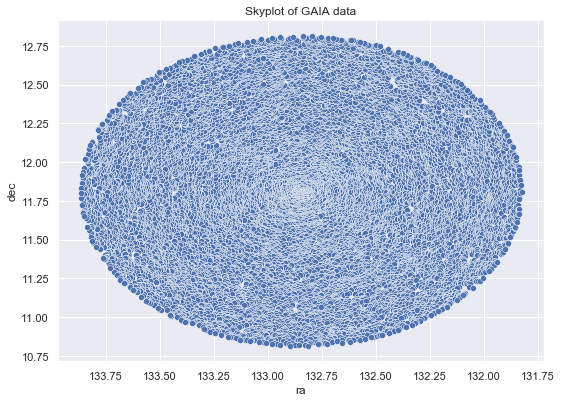

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', data = all_stars)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

### Applying Filter:
We will only apply those filters applied by Gao (2018).

In [7]:
# calculating the distance from the parallax
all_stars['distance_pc'] = 1/(all_stars.parallax*0.001)

In [8]:
print(len(all_stars))

# positive parallax
all_stars = all_stars[all_stars['parallax'] >= 0]
print(len(all_stars))

# dropping rows with null values in required columns
all_stars = all_stars[all_stars.loc[:, 'pmra'].notnull()]
all_stars = all_stars[all_stars.loc[:, 'parallax'].notnull()]
all_stars = all_stars[all_stars.loc[:, 'bp_rp'].notnull()]
print(len(all_stars))

# defining proper motion (pm) range
all_stars = all_stars[(abs(all_stars['pmra']) <= 20) & (abs(all_stars['pmdec']) <= 20)]
print(len(all_stars))

# taking stars within 60' = 1 deg radius
all_stars = all_stars[all_stars['dist'] < (60/60)]
print(len(all_stars))

# taking stars within a distance of 500 - 1600 pc
all_stars = all_stars[((all_stars['distance_pc']) < 1600) & ((all_stars['distance_pc']) > 500)]
print(len(all_stars))


19423
14198
14098
12972
12972
7316


### Building GMM Model

In [9]:
class Run_GMM_Model():
    '''
    This class runs GMM model to the selected part of the datset, predicts the member and field star
    group, calculates the evaluation metric and visualizes the results
    
    Attribute:
    ----------
    data:           Full dataset of stars (after applying noise filter)
    
    feature_colums: The list of columns used as the features of GMM model
    gmm:            The GMM model applied on data
    member:         The predicted member stars by GMM model in data
    non_member:     The predicted field stars by GMM model in data
    mss_metric:     Modified Silhouttee Score (MSS) for the current member and non_member group
    '''
    def __init__(self, data):
        '''
        Initializes the class with a dataset.
        
        Input: 
        -------
        data:       Full dataset of stars
        '''
        self.data = data
    
    def get_member(self, feature_columns, cutoff = 0.6, random_state = None):
        '''
        Classifies the working data into member and non_member groups.
        
        Inputs:
        -------
        feature_colums: The list of columns used as the features of GMM model
        cutoff:         Threshold used for member cutoff. Default is 0.6.
                        If cutoff is 0.6, stars with membership probability >= 0.6 are members
                        and the stars with membership probability <= 0.4 (1-0.6) are non-members
        random_state:   Random State of the GMM algorithm. Used for reproducibility.
                        If 'None', then each time a new random seed will be used. Default is None.
                        
        GMM clusters the data into two groups. The group which has smaller average standard deviation 
        (thus more compact) is defined as the member group.
        '''
        self.feature_columns = feature_columns        
        features = self.data.loc[:,feature_columns].dropna()

        # if there is less than 2 stars, GMM cannot divide them in two groups
        if len(self.data) < 2:
            raise ValueError('Less than two stars in the data')

        # normalizing the features
        scaled_features = pd.DataFrame({})
        for column in features.columns:
            scaled_features[column] = (features[column] - np.median(features[column]))/np.std(features[column])

        # Running GMM model
        gmm = GaussianMixture(n_components=2, random_state = random_state)
        gmm.fit(scaled_features)

        #predictions from gmm
        labels = gmm.predict(scaled_features)       # group no (0 or 1)
        probs = gmm.predict_proba(scaled_features)  # membership probability
        
        # first assuming the group 1 is the member group
        self.data.loc[:, 'PMemb'] = probs[:, 1]  # membership probability to be in group 1
        self.data.loc[:, 'gmm_label'] = labels

        # select member and non-member based on member threshold
        non_member_ind = self.data.loc[:, 'PMemb'] <= (1-cutoff)
        non_member = self.data.loc[non_member_ind, :]

        member_ind = self.data.loc[:, 'PMemb'] >= cutoff
        member = self.data.loc[member_ind, :]

        # check if the average standard deviation of member group is larger.
        # if yes, then change the member group and assign group 0 as the member group. 
        if member[feature_columns].std().mean() > non_member[feature_columns].std().mean():
            self.data.loc[:, 'PMemb'] = probs[:, 0] # membership probability to be in group 1
            self.data.loc[:, 'gmm_label'] = 1-labels

            # select member and non-member based on member threshold using new PMemb value
            non_member_ind = self.data.loc[:, 'PMemb'] <= (1-cutoff)
            non_member = self.data.loc[non_member_ind, :]

            member_ind = self.data.loc[:, 'PMemb'] >= cutoff
            member = self.data.loc[member_ind, :]

        # save the results as an attribute of the class
        self.member, self.non_member, self.gmm = member, non_member, gmm
    
    def get_MSS_metric(self, epsilon = 1e-7):
        '''
        Calculates modified silhouttee score (MSS) from the current member and non_member group.
        If any of the group has less than 2 member (thus SD = 0 or None), MSS value is 0.
        Otherwise, MSS is the average of (field_SD - member SD)/max(field_SD, member SD, epsilon) for all features.
        
        epsilon: a very small number to avoid dividing by 0, when both SD are 0. Default value 1e-7.
        '''
        if len(self.member) < 2 or len(self.non_member) < 2:
            return 0

        metric = np.zeros(len(self.feature_columns))
        for i in range(len(self.feature_columns)):
            feature_i = self.feature_columns[i]
            # (field_SD - member SD)/max(field_SD, member SD, epsilon) for each features
            metric[i] = (np.std(self.non_member[feature_i]) - np.std(self.member[feature_i])) \
                    / max(np.std(self.member[feature_i]), np.std(self.non_member[feature_i]), epsilon)
        
        self.mss_metric = metric.mean()
        return self.mss_metric
    
    def visualize_member(self, title = None):
        '''
        Visualizes the following four plots in a 2x2 (row x col) setup:
        1. Proper motion plot (pmra vs pmdec) for current member and non-member
        2. Parallax distribution for current member and non-member
        3. Color-Magnitude Diagram (CMD) for member group
        4. Color-Magnitude Diagram (CMD) for non-member group
        
        Input:
        -------
        title: An overall title of these set of figures
        '''
        plt.figure(figsize=(14,14))

        if title:
            plt.suptitle(title)

        plt.subplot(221)
        sns.scatterplot(data = self.non_member, x='pmra', y='pmdec', label = 'non_member', color = 'tab:blue')
        sns.scatterplot(data = self.member, x='pmra', y='pmdec', label = 'member', color = 'tab:red')
        plt.xlabel('pmra (mas/yr)')
        plt.ylabel('pmdec (mas/yr)')

        plt.subplot(222)
        sns.distplot(self.non_member.parallax, label = 'non_member', color = 'tab:blue', kde = True)
        sns.distplot(self.member.parallax, label = 'member', color = 'tab:red', kde = True)
        plt.xlabel('Parallax (mas)')
        plt.ylabel('Probability Density [$mas^{-1}$]')
        plt.legend()

        plt.subplot(223)
        sns.scatterplot(data = self.member, x='g_rp', y='phot_g_mean_mag', color = 'tab:red', label = 'member')
        plt.gca().invert_yaxis()
        plt.ylabel('G Magnitude')
        plt.xlabel('G - RP Color')

        plt.subplot(224)
        sns.scatterplot(data = self.non_member, x='g_rp', y='phot_g_mean_mag', color = 'tab:blue', label = 'non member')
        plt.gca().invert_yaxis()
        plt.ylabel('G Magnitude')
        plt.xlabel('G - RP Color')

        plt.show()

In [12]:
feature_columns = ['pmra', 'pmdec', 'ra', 'dec', 'parallax']
gmm_model = Run_GMM_Model(all_stars)
gmm_model.get_member(feature_columns, cutoff=0.6, random_state = 42)

number of member: 1416,
 number of field star: 5867,
 MSS: 0.70


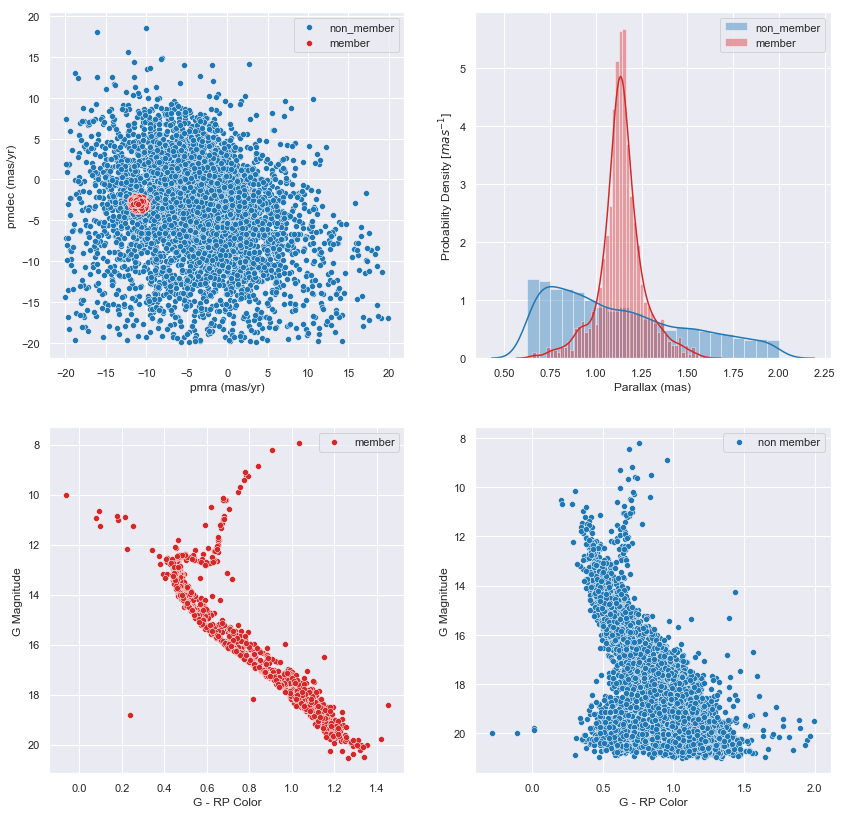

In [13]:
MSS = gmm_model.get_MSS_metric()

print(f'number of member: {len(gmm_model.member)},\n number of field star: {len(gmm_model.non_member)},\n MSS: {MSS:0.2f}') 
gmm_model.visualize_member()

number of member: 1261,
         number of field star: 5795,
         MSS: 0.73


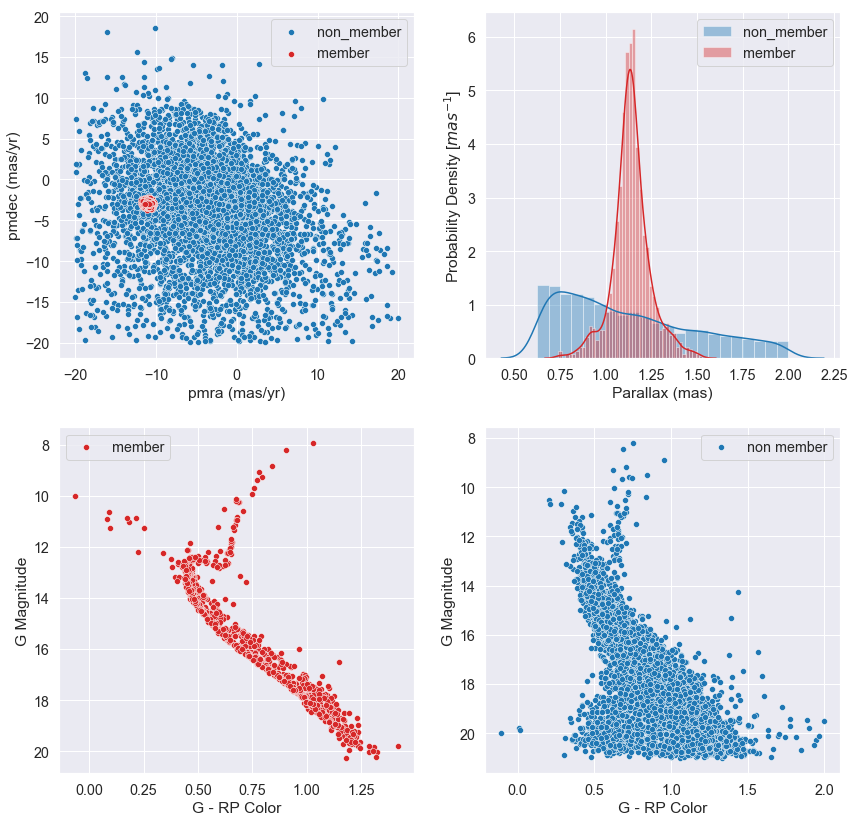

In [60]:
# check the MSS with a more strict member cutoff
# to compare with the modified model
feature_columns = ['pmra', 'pmdec', 'ra', 'dec', 'parallax']

gmm_model_2 = Run_GMM_Model(all_stars)
gmm_model_2.get_member(feature_columns, cutoff=0.95, random_state = 42)
MSS = gmm_model_2.get_MSS_metric()

print(f'number of member: {len(gmm_model_2.member)},\n \
        number of field star: {len(gmm_model_2.non_member)},\n \
        MSS: {MSS:0.2f}') 
gmm_model_2.visualize_member()

### Comparing with Gao Paper

In [14]:
member, non_member, gmm = gmm_model.member, gmm_model.non_member, gmm_model.gmm
all_stars = gmm_model.data

#### Members and Covariance Matrix

Depending on the cutoff on PMemb, the number of stars are following:
* Likely member (PMemb >= 0.6) = 1401
* High-probability member (PMemb >= 0.95) = 1256
* Zero-probability field star (PMemb = 0) = 5720

And the covariance matrix for field stars group, $\sum_f$ and the member group $\sum_c$ are following:


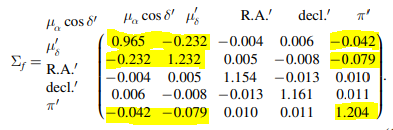

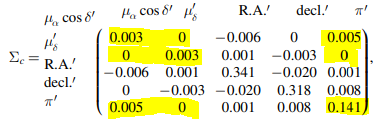

In [15]:
gmm.covariances_.round(3)

array([[[ 9.630e-01, -2.320e-01, -5.000e-03,  4.000e-03, -4.200e-02],
        [-2.320e-01,  1.236e+00,  5.000e-03, -1.000e-02, -7.900e-02],
        [-5.000e-03,  5.000e-03,  1.158e+00, -1.300e-02,  8.000e-03],
        [ 4.000e-03, -1.000e-02, -1.300e-02,  1.163e+00,  7.000e-03],
        [-4.200e-02, -7.900e-02,  8.000e-03,  7.000e-03,  1.205e+00]],

       [[ 3.000e-03, -0.000e+00, -6.000e-03, -0.000e+00,  5.000e-03],
        [-0.000e+00,  3.000e-03,  1.000e-03, -3.000e-03, -0.000e+00],
        [-6.000e-03,  1.000e-03,  3.420e-01, -2.000e-02, -0.000e+00],
        [-0.000e+00, -3.000e-03, -2.000e-02,  3.210e-01,  7.000e-03],
        [ 5.000e-03, -0.000e+00, -0.000e+00,  7.000e-03,  1.500e-01]]])

In [16]:
len(member), len(non_member)

(1416, 5867)

In [17]:
print('n(PMemb >= 0.6) =', sum(all_stars.PMemb >= 0.6))
print('n(PMemb >= 0.95) =', sum(all_stars.PMemb >= 0.95))
print('n(PMemb <= 0.0001) =', sum(all_stars.PMemb <= 0.0001))

n(PMemb >= 0.6) = 1416
n(PMemb >= 0.95) = 1261
n(PMemb <= 0.0001) = 5691


#### Figure 1
PMemb histogram and the plot for PMemb vs G band magnitude.

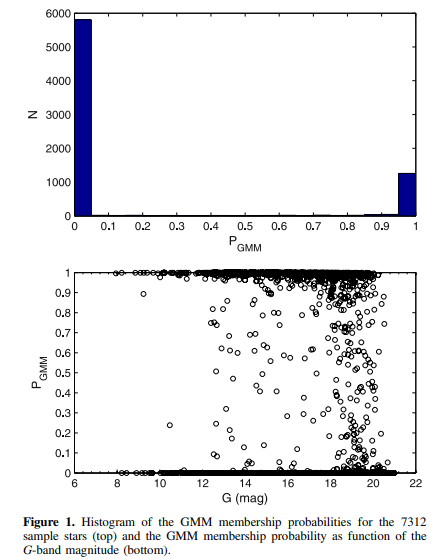


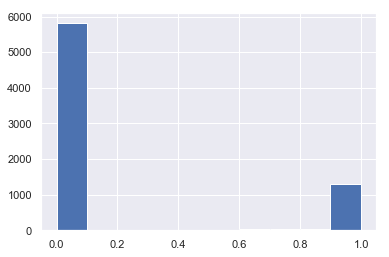

In [18]:
plt.hist(all_stars.PMemb)
plt.show()

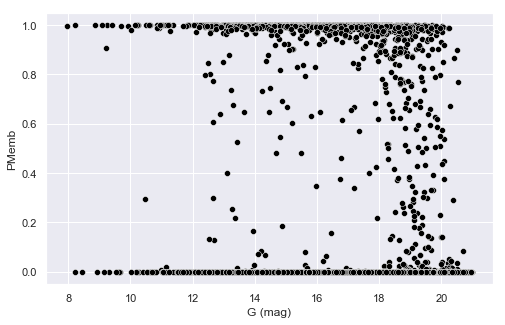

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='phot_g_mean_mag', y = 'PMemb', data = all_stars, color = 'black')
plt.xlabel('G (mag)')
plt.show()

#### Figure 2
Proper Motion Plot

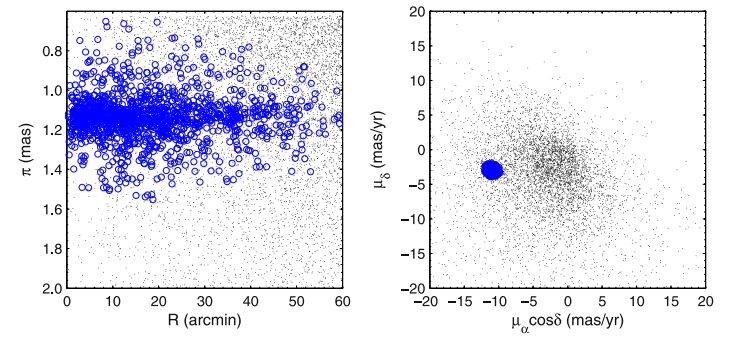

In [20]:
training_data = pd.concat([member.assign(member=1), non_member.assign(member=0)])
training_data.head()

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist,distance_pc,PMemb,gmm_label,member
0,1635721458409799680,b'Gaia DR2 604917629355038848',604917629355038848,309606362,2015.5,132.845427,0.033842,11.813721,0.022365,1.129222,...,2.115395,5.409647,5.116649,5.702646,b'https://gea.esac.esa.int/data-server/datalin...,0.000629,885.565629,0.999435,1,1
2,1635721458409799680,b'Gaia DR2 604917732434252032',604917732434252032,1037136882,2015.5,132.847883,0.047155,11.818284,0.028357,1.113444,...,0.770030,0.286409,0.253650,0.319167,b'https://gea.esac.esa.int/data-server/datalin...,0.004667,898.114453,0.999209,1,1
3,1635721458409799680,b'Gaia DR2 604917732434325248',604917732434325248,1685360922,2015.5,132.845628,0.023422,11.820310,0.014362,1.125087,...,1.456640,3.119858,2.927116,3.312600,b'https://gea.esac.esa.int/data-server/datalin...,0.006326,888.820446,0.999332,1,1
4,1635721458409799680,b'Gaia DR2 604917629355039360',604917629355039360,340729517,2015.5,132.846939,0.039546,11.807362,0.023041,1.111626,...,1.798127,1.604247,1.452243,1.756252,b'https://gea.esac.esa.int/data-server/datalin...,0.006695,899.583451,0.998077,1,1
5,1635721458409799680,b'Gaia DR2 604917698074587136',604917698074587136,1308383390,2015.5,132.840032,0.034797,11.817361,0.020084,1.189351,...,0.920168,0.544629,0.501133,0.588124,b'https://gea.esac.esa.int/data-server/datalin...,0.006747,840.794499,0.999475,1,1


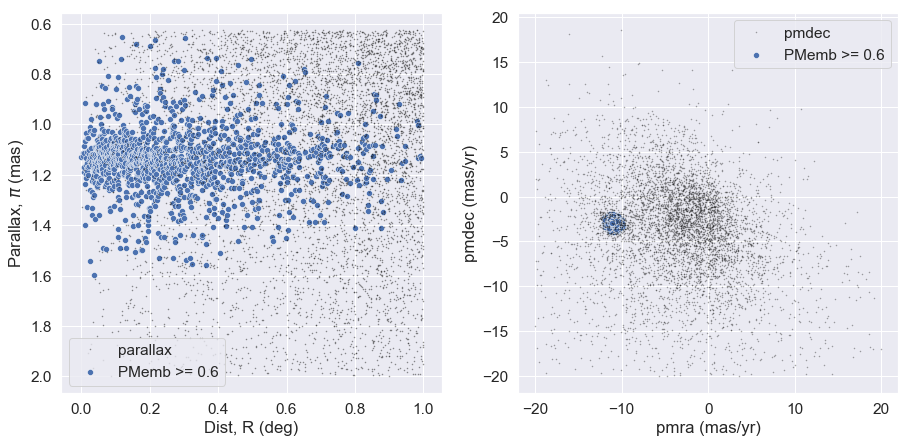

In [21]:
sns.set(font_scale = 1.4)

plt.figure(figsize = (15,7))

plt.subplot(121)
plt.plot(non_member['dist'], non_member['parallax'], 'k.',  alpha = 0.5,
         markersize = 1)
plt.gca().invert_yaxis()
sns.scatterplot('dist', 'parallax', data = member, label = 'PMemb >= 0.6')
plt.xlabel('Dist, R (deg)')
plt.ylabel('Parallax, $\pi$ (mas)')
plt.legend()
#plt.title('Member')

plt.subplot(122)
plt.plot(non_member['pmra'], non_member['pmdec'], 'k.', alpha = 0.4, 
         markersize = 1)
sns.scatterplot('pmra', 'pmdec', data = member, label = 'PMemb >= 0.6')
plt.ylabel('pmdec (mas/yr)')
plt.xlabel('pmra (mas/yr)')
plt.legend()
#plt.title('Non Member')
plt.show()

#### Figure 3: CMD
Color-Magnitude Diagram

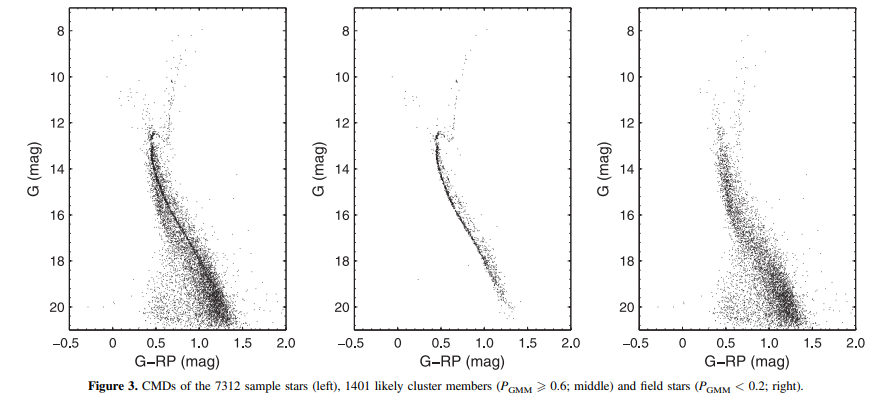

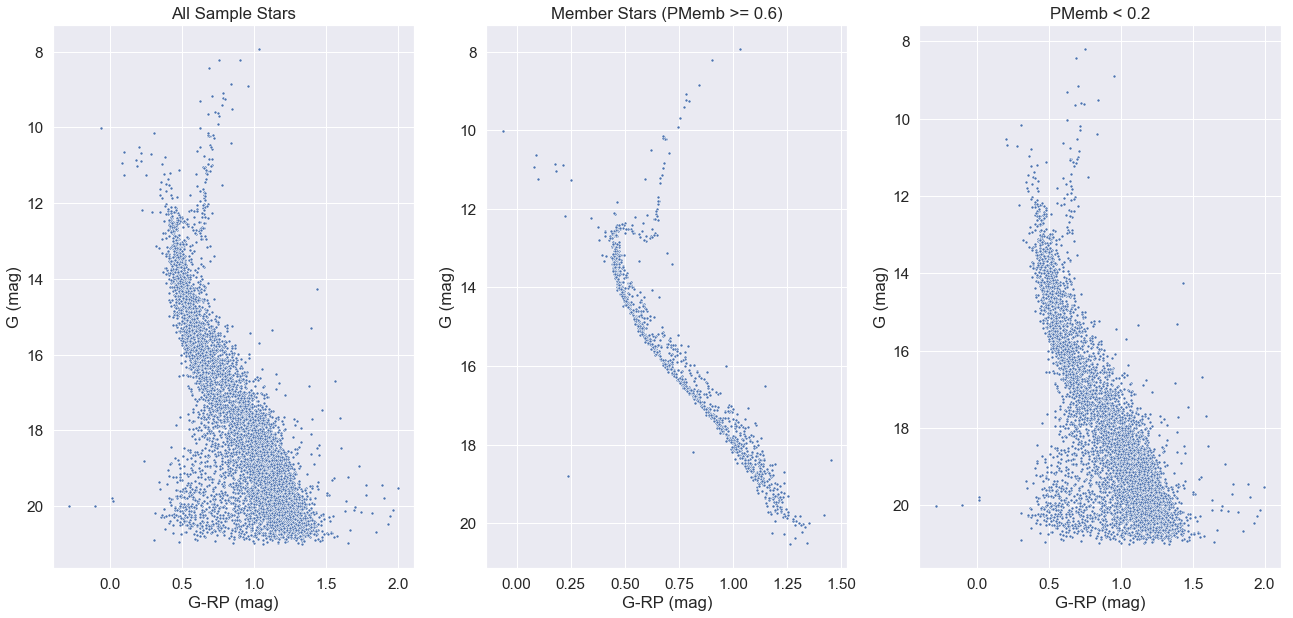

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(22,10))
#fig.suptitle('CMD of Training data for M67')

sns.scatterplot(x = 'g_rp', y='phot_g_mean_mag',
                data = training_data, ax = axes[0], marker = '.')
axes[0].set_title('All Sample Stars')
axes[0].set_xlabel('G-RP (mag)')
axes[0].set_ylabel('G (mag)')
axes[0].invert_yaxis()

sns.scatterplot(x = 'g_rp', y='phot_g_mean_mag', marker = '.',
                data = member, ax = axes[1])
axes[1].set_title('Member Stars (PMemb >= 0.6)')
axes[1].set_xlabel('G-RP (mag)')
axes[1].set_ylabel('G (mag)')
axes[1].invert_yaxis()

sns.scatterplot(x = 'g_rp', y='phot_g_mean_mag',  marker = '.',
                data = non_member[non_member.PMemb < 0.2], ax = axes[2])
axes[2].set_title('PMemb < 0.2')
axes[2].invert_yaxis()
axes[2].set_xlabel('G-RP (mag)')
axes[2].set_ylabel('G (mag)')

plt.show()


#### Distribution of features

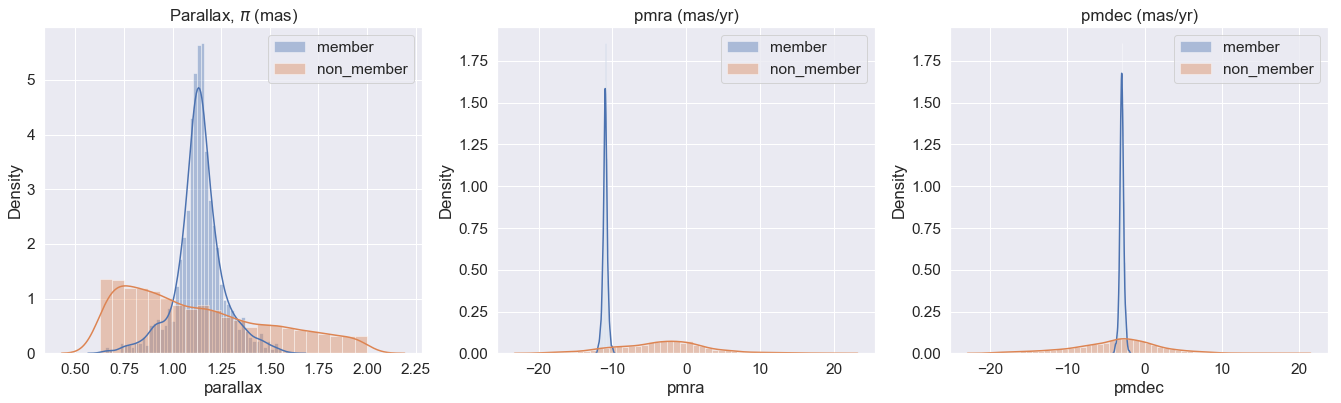

In [23]:
plt.figure(figsize = (23,6))

plt.subplot(131)
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.title('Parallax, $\pi$ (mas)')
plt.legend()

plt.subplot(132)
sns.distplot(member.pmra, label='member')
sns.distplot(non_member.pmra, label = 'non_member')
plt.title('pmra (mas/yr)')
plt.legend()

plt.subplot(133)
sns.distplot(member.pmdec, label='member')
sns.distplot(non_member.pmdec, label = 'non_member')
plt.title('pmdec (mas/yr)')
plt.legend()

plt.show()

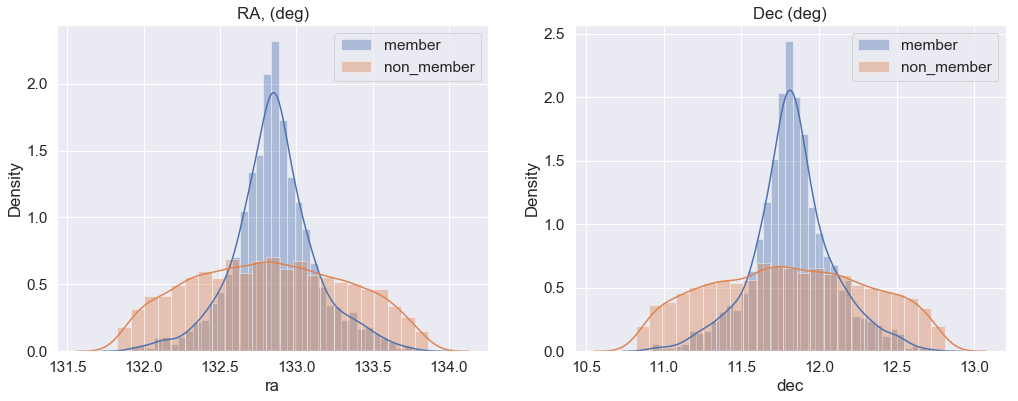

In [24]:
plt.figure(figsize = (17,6))

plt.subplot(121)
sns.distplot(member.ra, label='member')
sns.distplot(non_member.ra, label = 'non_member')
plt.title('RA, (deg)')
plt.legend()

plt.subplot(122)
sns.distplot(member.dec, label='member')
sns.distplot(non_member.dec, label = 'non_member')
plt.title('Dec (deg)')
plt.legend()

plt.show()

## Replication: Random Forest

Here we used the training data retrieved from GMM model to train a random forest model. Then predicted the cluster membership for a larger radius (2.5 degree) around the cluster center.

### Training Data

In [25]:
## chosing the member cutoff according to Gao (2018)
member = member[member.PMemb >= 0.95]
non_member = non_member[non_member.PMemb <= 0.0001]

training_data = pd.concat([member.assign(member=1), non_member.assign(member=0)])
training_data.head()

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist,distance_pc,PMemb,gmm_label,member
0,1635721458409799680,b'Gaia DR2 604917629355038848',604917629355038848,309606362,2015.5,132.845427,0.033842,11.813721,0.022365,1.129222,...,2.115395,5.409647,5.116649,5.702646,b'https://gea.esac.esa.int/data-server/datalin...,0.000629,885.565629,0.999435,1,1
2,1635721458409799680,b'Gaia DR2 604917732434252032',604917732434252032,1037136882,2015.5,132.847883,0.047155,11.818284,0.028357,1.113444,...,0.770030,0.286409,0.253650,0.319167,b'https://gea.esac.esa.int/data-server/datalin...,0.004667,898.114453,0.999209,1,1
3,1635721458409799680,b'Gaia DR2 604917732434325248',604917732434325248,1685360922,2015.5,132.845628,0.023422,11.820310,0.014362,1.125087,...,1.456640,3.119858,2.927116,3.312600,b'https://gea.esac.esa.int/data-server/datalin...,0.006326,888.820446,0.999332,1,1
4,1635721458409799680,b'Gaia DR2 604917629355039360',604917629355039360,340729517,2015.5,132.846939,0.039546,11.807362,0.023041,1.111626,...,1.798127,1.604247,1.452243,1.756252,b'https://gea.esac.esa.int/data-server/datalin...,0.006695,899.583451,0.998077,1,1
5,1635721458409799680,b'Gaia DR2 604917698074587136',604917698074587136,1308383390,2015.5,132.840032,0.034797,11.817361,0.020084,1.189351,...,0.920168,0.544629,0.501133,0.588124,b'https://gea.esac.esa.int/data-server/datalin...,0.006747,840.794499,0.999475,1,1


In [26]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,distance_pc,PMemb,gmm_label,member
count,6.952000e+03,6.952000e+03,6.952000e+03,6952.0,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,...,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,6952.000000,6952.000000,6.952000e+03,6952.000000,6952.000000
mean,1.635721e+18,6.035156e+17,8.538759e+08,2015.5,132.832747,0.304740,11.815882,0.198704,1.128831,0.382945,...,1.314135,1.516081,3.632524,3.375423,3.889622,0.598221,966.044500,1.804158e-01,0.181387,0.181387
std,0.000000e+00,3.051381e+15,4.853574e+08,0.0,0.470426,0.345950,0.470440,0.228036,0.337830,0.427940,...,2.357275,2.643748,23.314028,21.835037,24.796238,0.274930,282.287977,3.833199e-01,0.385366,0.385366
min,1.635721e+18,5.986135e+17,2.657300e+04,2015.5,131.826966,0.017678,10.818079,0.011441,0.625008,0.021383,...,0.377262,0.512218,0.055483,0.048620,0.062345,0.000629,500.410070,0.000000e+00,0.000000,0.000000
25%,1.635721e+18,5.989668e+17,4.415662e+08,2015.5,132.487498,0.049780,11.472959,0.032315,0.859284,0.062473,...,0.703489,0.820851,0.318118,0.270045,0.368188,0.376808,761.007849,0.000000e+00,0.000000,0.000000
50%,1.635721e+18,6.049045e+17,8.565796e+08,2015.5,132.832269,0.171626,11.814476,0.111911,1.101752,0.219939,...,0.894862,1.025998,0.724518,0.633378,0.795201,0.643138,907.645141,3.886633e-194,0.000000,0.000000
75%,1.635721e+18,6.049931e+17,1.275009e+09,2015.5,133.172902,0.440017,12.157200,0.282104,1.314047,0.557986,...,1.205561,1.432157,2.019982,1.860474,2.169358,0.836376,1163.760229,1.632188e-40,0.000000,0.000000
max,1.635721e+18,6.081334e+17,1.692756e+09,2015.5,133.863793,2.812388,12.810881,1.649514,1.998361,3.558823,...,48.507950,56.827263,586.685608,552.350098,621.021118,0.999960,1599.978415,9.995129e-01,1.000000,1.000000


In [27]:
# Taking all astrometric and photometric features
feature_columns = ['pmra', 'pmdec', 'ra', 'dec',
                   'parallax', 'phot_g_mean_mag',
                   "phot_bp_mean_mag", 'phot_rp_mean_mag',
                   'bp_rp', 'bp_g', 'g_rp']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [28]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')

# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,pmra,pmdec,ra,dec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp
count,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000
mean,-4.615677,-3.604484,132.832779,11.815845,1.128832,17.648365,18.314987,16.773708,1.541258,0.666585,0.874674
std,6.286309,5.139015,0.470426,0.470440,0.337829,2.420205,2.571546,2.212619,0.553267,0.322774,0.283159
min,-19.999044,-19.966204,131.826965,10.818079,0.625008,7.943599,8.883092,6.912045,-0.142782,-1.010054,-0.105911
25%,-10.714220,-6.088152,132.487499,11.472959,0.859284,15.882435,16.364204,15.235474,1.037360,0.399820,0.617733
50%,-4.496929,-3.001631,132.832268,11.814476,1.101752,18.245262,19.107480,17.265498,1.562587,0.647237,0.891215
75%,-0.278246,-0.831341,133.172897,12.157200,1.314047,19.681985,20.518398,18.586138,2.009539,0.913029,1.115398
max,19.932800,18.545561,133.863800,12.810881,1.998361,20.992826,22.350058,20.603453,3.014662,1.654076,1.996153


In [29]:
targets.value_counts()

0    5691
1    1261
Name: member, dtype: int64

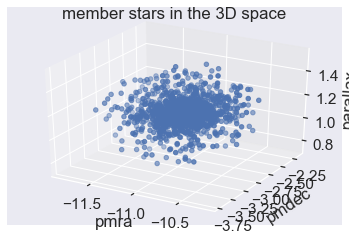

In [30]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


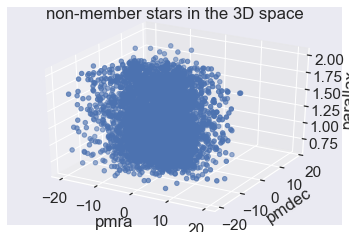

In [31]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


### Model Training and Prediction

In [32]:
base_model = RandomForestClassifier(n_estimators = 7000, 
                                    max_features = 4,
                                    oob_score = True, 
                                    random_state = 42)
base_model.fit(features, targets)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7000, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [33]:
base_model.oob_score_

0.9989930955120828

In [34]:
y_pred = base_model.predict(features)
precision_Gao = precision_score( y_true=targets, y_pred = y_pred)
precision_Gao

1.0

### Prediction for the new stars

In [35]:
## chosing only GAIA stars close to 2.5 degree radius of the center

coordinate = coord.SkyCoord.from_name('M67')
print(coordinate)
radius = u.Quantity(2.5, u.deg)
Gaia.ROW_LIMIT = -1
# table = "gaiaedr3.gaia_source"
table = "gaiadr2.gaia_source"
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (132.846, 11.814)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [36]:
GAIA_target_stars = r.to_pandas()

GAIA_target_stars = GAIA_target_stars[GAIA_target_stars['parallax'] >= 0]

GAIA_target_stars = GAIA_target_stars[GAIA_target_stars.loc[:, 'bp_rp'].notnull()]

GAIA_target_stars = GAIA_target_stars[(abs(GAIA_target_stars['pmra']) < 20) & (abs(GAIA_target_stars['pmdec']) < 20)]

GAIA_target_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,7.098700e+04,7.098700e+04,7.098700e+04,70987.0,70987.000000,70987.000000,70987.000000,70987.000000,70987.000000,70987.000000,...,14780.000000,14780.000000,14337.0,14337.000000,14337.000000,14337.000000,14337.000000,14337.000000,14337.000000,70987.000000
mean,1.635721e+18,6.031195e+17,8.493591e+08,2015.5,132.757990,0.356870,11.776840,0.238726,1.040891,0.442350,...,0.099434,0.269887,200111.0,1.530959,1.411662,1.629827,4.420034,3.915124,4.924970,1.628621
std,0.000000e+00,3.772720e+15,4.885702e+08,0.0,1.253718,0.372633,1.233941,0.254779,0.896286,0.458192,...,0.136835,0.215108,0.0,2.990820,2.782772,3.180019,32.316772,28.910522,35.820766,0.620369
min,1.635721e+18,5.972678e+17,2.351200e+04,2015.5,130.293414,0.016709,9.317264,0.010515,0.000025,0.019948,...,0.000000,0.007100,200111.0,0.500071,0.335750,0.512218,0.029315,0.027656,0.030974,0.000629
25%,1.635721e+18,5.987866e+17,4.266851e+08,2015.5,131.757759,0.082238,10.783180,0.054873,0.460425,0.103831,...,0.008900,0.117000,200111.0,0.770195,0.699413,0.812905,0.322958,0.271497,0.370009,1.191328
50%,1.635721e+18,6.038886e+17,8.508727e+08,2015.5,132.735646,0.221730,11.772763,0.148129,0.818595,0.281179,...,0.048000,0.209800,200111.0,0.989648,0.907884,1.050576,0.781250,0.673000,0.884455,1.740937
75%,1.635721e+18,6.054554e+17,1.273630e+09,2015.5,133.734970,0.512807,12.754763,0.334747,1.346659,0.632646,...,0.130900,0.352000,200111.0,1.355431,1.240289,1.468601,2.017636,1.754474,2.262021,2.153055
max,1.635721e+18,6.092614e+17,1.692917e+09,2015.5,135.397369,3.119140,14.309803,2.653485,21.760508,4.168016,...,1.068500,1.447100,200111.0,90.470146,80.827682,98.599403,1537.619263,1312.932617,1762.305908,2.499963


In [37]:
GAIA_target_stars = GAIA_target_stars.dropna(subset = feature_columns)
len(GAIA_target_stars)

70987

In [38]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [39]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = base_model.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    69391
1     1596
Name: member, dtype: int64

### Comparing with Gao Paper

#### Members

Number of members found by Gao with a RF model with n_estimators = 7000:
* n(PMemb >= 0.6) = 1502
* n(PMemb >= 0.8) = 1361

In [40]:
# estimate the membership probability of the stars
# here we used n_estimators = 7000
GAIA_target_stars['PMemb'] = base_model.predict_proba(new_features)[:,1]
print('n(PMemb >= 0.6) =', sum(GAIA_target_stars['PMemb'] >= 0.6))
print('n(PMemb >= 0.8) =', sum(GAIA_target_stars['PMemb'] >= 0.8))

n(PMemb >= 0.6) = 1529
n(PMemb >= 0.8) = 1375


In [55]:
# estimate the membership probability of the stars
# here we used n_estimators = 7000
print('n(PMemb >= 0.6) =', sum(GAIA_target_stars['PMemb'] >= 0.6))
print('n(PMemb >= 0.8) =', sum(GAIA_target_stars['PMemb'] >= 0.8))
print('n(PMemb >= 0.95) =', sum(GAIA_target_stars['PMemb'] >= 0.95))

n(PMemb >= 0.6) = 1529
n(PMemb >= 0.8) = 1375
n(PMemb >= 0.95) = 1192


In [61]:
potentialMember = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.8]
len(potentialMember)

1375

In [42]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,member,PMemb
count,1.529000e+03,1.529000e+03,1.529000e+03,1529.0,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,...,1008.0,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1529.000000,1529.0,1529.000000
mean,1.635721e+18,6.041404e+17,8.310155e+08,2015.5,132.857611,0.093778,11.817842,0.061835,1.124039,0.118526,...,200111.0,1.543801,1.425414,1.655418,4.280391,4.014855,4.545925,0.432720,1.0,0.952645
std,0.000000e+00,2.321957e+15,4.814494e+08,0.0,0.452462,0.104704,0.442918,0.071465,0.154954,0.132645,...,0.0,2.865541,2.692704,3.057625,27.376322,25.798944,28.954882,0.452855,0.0,0.093112
min,1.635721e+18,5.975889e+17,1.427216e+06,2015.5,130.396966,0.018080,9.365995,0.011963,0.098562,0.021383,...,200111.0,0.514981,0.375463,0.586270,0.089308,0.071800,0.104245,0.000629,1.0,0.602143
25%,1.635721e+18,6.048928e+17,4.135839e+08,2015.5,132.691355,0.030505,11.667474,0.020075,1.080685,0.038216,...,200111.0,0.827428,0.746000,0.864346,0.336221,0.291439,0.374895,0.146059,1.0,0.968571
50%,1.635721e+18,6.049175e+17,8.287319e+08,2015.5,132.851151,0.047155,11.820329,0.030479,1.135503,0.059752,...,200111.0,1.021570,0.950400,1.084995,0.861585,0.788277,0.935925,0.287518,1.0,0.998000
75%,1.635721e+18,6.049631e+17,1.251332e+09,2015.5,133.014245,0.119128,11.982769,0.078361,1.191200,0.146318,...,200111.0,1.419631,1.299864,1.557047,2.395173,2.258484,2.546502,0.557572,1.0,0.999857
max,1.635721e+18,6.088616e+17,1.691157e+09,2015.5,135.392388,0.716131,14.297512,0.661075,1.553253,0.963365,...,200111.0,51.551559,48.507950,56.827263,586.685608,552.350098,621.021118,2.499166,1.0,1.000000


In [43]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,distance_pc,PMemb,gmm_label
count,1.261000e+03,1.261000e+03,1.261000e+03,1261.0,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,1.635721e+18,6.043320e+17,8.378890e+08,2015.5,132.858306,0.078646,11.836934,0.051699,1.140040,0.099313,...,1.578989,1.457888,1.694436,4.519963,4.242636,4.797292,0.286355,884.881088,0.994646,1.0
std,0.000000e+00,1.938452e+15,4.803406e+08,0.0,0.258105,0.089355,0.242898,0.060374,0.105063,0.113740,...,2.982491,2.801324,3.183924,28.733906,27.078060,30.390810,0.203519,85.343803,0.008530,0.0
min,1.635721e+18,5.986712e+17,1.427216e+06,2015.5,132.008433,0.018080,10.993079,0.011963,0.742061,0.021383,...,0.514981,0.389567,0.586270,0.089308,0.071800,0.104245,0.000629,654.027288,0.952098,1.0
25%,1.635721e+18,6.049021e+17,4.208284e+08,2015.5,132.715982,0.029027,11.707009,0.019151,1.090276,0.036540,...,0.833935,0.755949,0.871163,0.348000,0.315264,0.393428,0.123613,840.504553,0.994858,1.0
50%,1.635721e+18,6.049178e+17,8.335306e+08,2015.5,132.851199,0.040901,11.821556,0.026931,1.137606,0.051370,...,1.033211,0.966655,1.094570,0.907598,0.844309,0.974423,0.239955,879.039050,0.998306,1.0
75%,1.635721e+18,6.049588e+17,1.264148e+09,2015.5,132.990119,0.093011,11.957355,0.060629,1.189762,0.119232,...,1.454672,1.339263,1.589160,2.483683,2.337486,2.641770,0.400593,917.198879,0.999100,1.0
max,1.635721e+18,6.080352e+17,1.691157e+09,2015.5,133.806044,0.689268,12.624980,0.592817,1.528988,0.963365,...,51.551559,48.507950,56.827263,586.685608,552.350098,621.021118,0.946796,1347.598854,0.999513,1.0


#### Figure 4
PMemb from RF as a function of G band Magnitude and distance from cluster center.

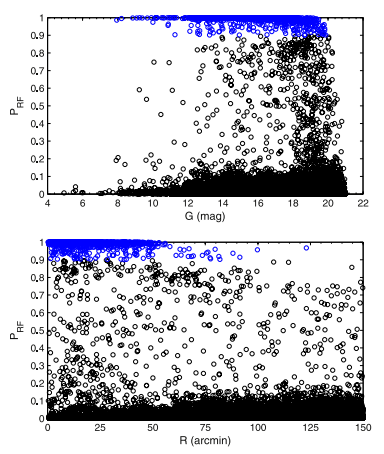

PMemb $\geq$ 0.9 are colored in blue.

In [44]:
sns.set(font_scale=1.1)

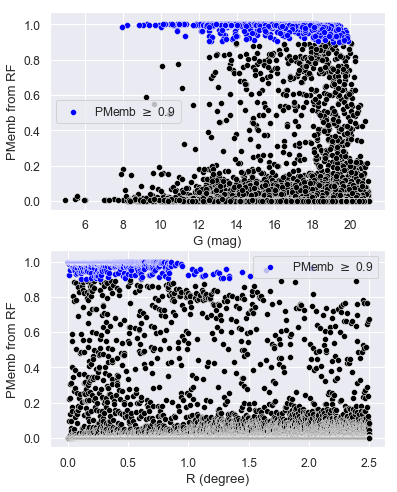

In [45]:
plt.figure(figsize = (6, 8))

PMemb_mask = GAIA_target_stars.PMemb >= 0.9
plt.subplot(211)
sns.scatterplot(x='phot_g_mean_mag', y = 'PMemb', data = GAIA_target_stars, 
                color = 'black')
sns.scatterplot(x='phot_g_mean_mag', y = 'PMemb', 
                data = GAIA_target_stars[PMemb_mask], 
                color = 'blue', label = 'PMemb $\geq$ 0.9')
plt.legend()
plt.xlabel('G (mag)')
plt.ylabel('PMemb from RF')
#plt.title('Member')

plt.subplot(212)
sns.scatterplot(x='dist', y = 'PMemb', data = GAIA_target_stars, 
                color = 'black')
sns.scatterplot(x='dist', y = 'PMemb', 
                data = GAIA_target_stars[PMemb_mask], 
                color = 'blue', label = 'PMemb $\geq$ 0.9')
plt.legend()
plt.xlabel('R (degree)')
plt.ylabel('PMemb from RF')
#plt.title('Non Member')
plt.show()

#### Figure 7: CMD

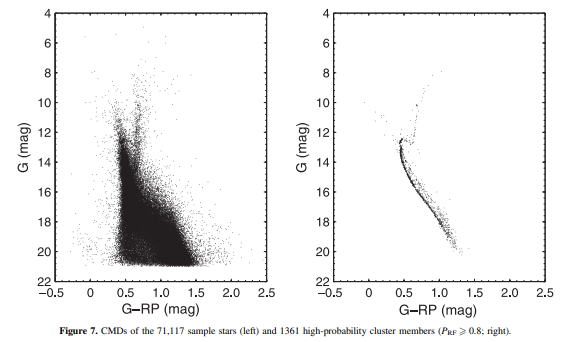

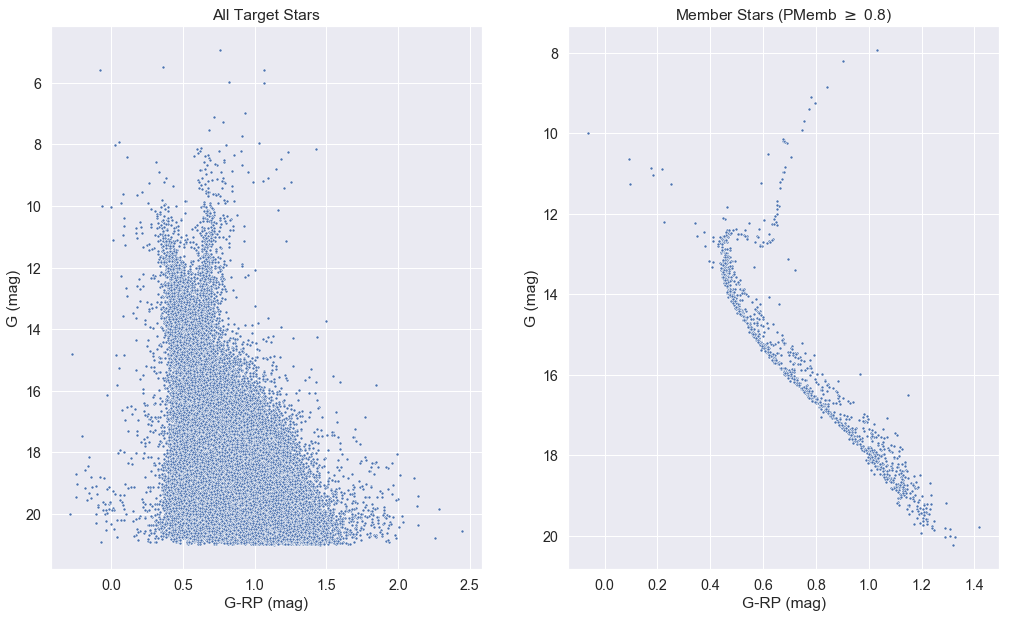

In [46]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(1, 2, figsize=(17,10))
#fig.suptitle('CMD of Training data for M67')

sns.scatterplot(x = 'g_rp', y='phot_g_mean_mag',
                data = GAIA_target_stars, ax = axes[0], marker = '.')
axes[0].set_title('All Target Stars')
axes[0].set_xlabel('G-RP (mag)')
axes[0].set_ylabel('G (mag)')
axes[0].invert_yaxis()

PMemb_mask = GAIA_target_stars.PMemb >= 0.8

sns.scatterplot(x = 'g_rp', y='phot_g_mean_mag', marker = '.',
                data = GAIA_target_stars[PMemb_mask], ax = axes[1])
axes[1].set_title('Member Stars (PMemb $\geq$ 0.8)')
axes[1].set_xlabel('G-RP (mag)')
axes[1].set_ylabel('G (mag)')
axes[1].invert_yaxis()

plt.show()


#### Figure 8
Comparison between GMM and RF membership probabilities

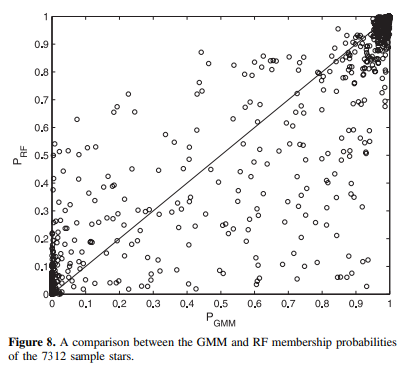

In [47]:
# find the RF membership probability of the working data for
# which we have the gmm membership probability of all stars
all_stars_feature = all_stars.loc[:, feature_columns]
all_stars['PMemb_RF'] = base_model.predict_proba(all_stars_feature)[:,1]

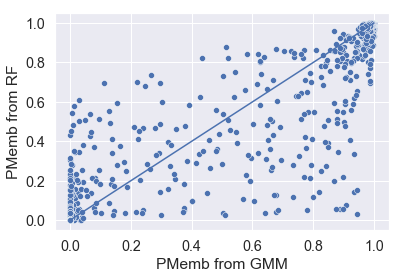

In [48]:
sns.scatterplot(x = 'PMemb', y = 'PMemb_RF', data = all_stars)
plt.ylabel('PMemb from RF')
plt.xlabel('PMemb from GMM')
plt.plot([0,1],[0,1])
plt.show()

### Distribution of the paramters

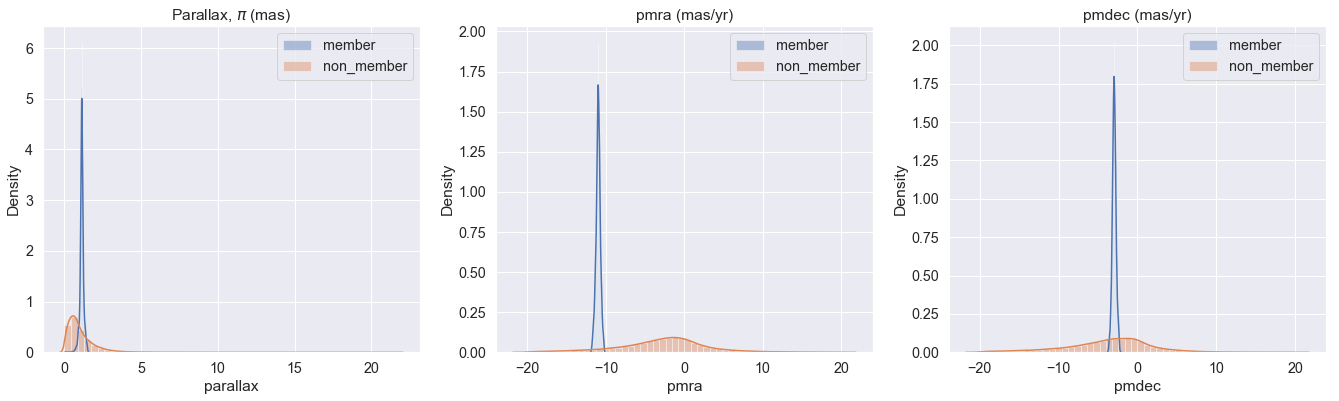

In [62]:
sns.set(font_scale=1.3)
plt.figure(figsize = (23,6))

member_mask = GAIA_target_stars.PMemb >= 0.8
field_mask = GAIA_target_stars.PMemb <= 0.2
member = GAIA_target_stars[member_mask]
non_member = GAIA_target_stars[field_mask]


plt.subplot(131)
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.title('Parallax, $\pi$ (mas)')
plt.legend()

plt.subplot(132)
sns.distplot(member.pmra, label='member')
sns.distplot(non_member.pmra, label = 'non_member')
plt.title('pmra (mas/yr)')
plt.legend()

plt.subplot(133)
sns.distplot(member.pmdec, label='member')
sns.distplot(non_member.pmdec, label = 'non_member')
plt.title('pmdec (mas/yr)')
plt.legend()

plt.show()

#### Other Visualization

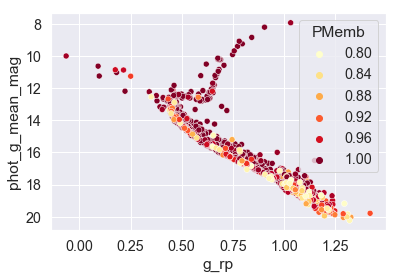

In [50]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'g_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.8] )
cmd.invert_yaxis()

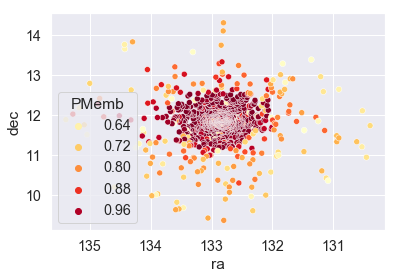

In [51]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.6] )
skyplot.invert_xaxis()
plt.show()


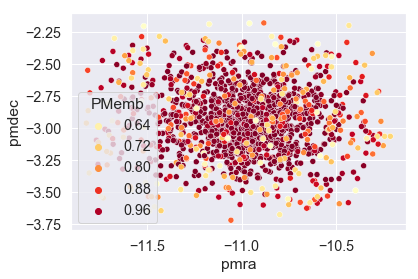

In [52]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.6] )
plt.show()


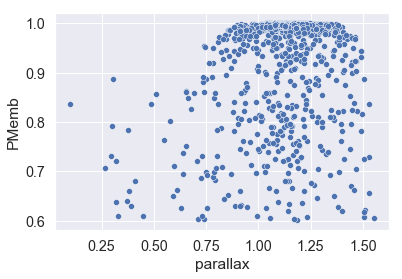

In [53]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.6] )

In [54]:
# saving the files as csv
# all_stars.to_csv('gaia_6405_membership_prob.csv')

potentialMember.to_csv('M_67_membership_prob.csv')
